# Carga de Librerias

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


In [ ]:
!pip install unidecode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.7 MB/s eta 0:00:00


# Creación de la base de datos

In [ ]:
data = {
    "Nombre": [
        "Ricky Martin",
        "Thalía",
        "Romeo Santos",
        "J Balvin",
        "Daddy Yankee",
        "Paulina Rubio",
        "Gloria Estefan",
        "Julieta Venegas",
        "Calle 13",
        "Camilo",
        "Carlos Santana",
        "Diego Torres",
        "Jesse & Joy",
        "Chayanne",
        "Maná",
        "Gustavo Cerati",
        "Celia Cruz",
        "Caetano Veloso",
        "Rubén Blades",
        "Vicente Fernández",
        "Café Tacvba",
        "Los Tigres del Norte",
        "Pedro Infante",
        "Silvio Rodríguez",
        "Shakira",
        "Karol G",
        "Anitta",
        "Juanes",
        "Luis Miguel",
        "Maluma",
        "Carlos Vives",
        "Bad Bunny",
        "Peso Pluma",
        "Morat",
           #
        "Feid",
        "Silvestre Dangond",
        "Rikarena",
        "Grupo Niche",
        "Gilberto Santa Rosa",
        "Maelo Ruiz"
     ],
    "Biografía": [
        "Ricky Martin es un cantante, actor y autor puertorriqueño, conocido como el Rey del pop latino. Nació en San Juan y es conocido por su versatilidad musical, con su discografía que abarca los géneros pop latino, pop, dance, reguetón y salsa.",
        "Thalía es una cantante, actriz y empresaria mexicana. Nació en ciudad de mexico y es considerada una de las artistas latinas más exitosas de todos los tiempos, gracias a sus clasicas canciones de pop y blues.",
        "Romeo Santos, conocido como el Rey de la bachata, es un cantante, productor discográfico, compositor, actor y artista estadounidense de ascendencia dominicana. Nació en Nueva York. Saltó a la fama como miembro del grupo Aventura y luego continuó su carrera en solitario.",
        "J Balvin es un cantante y compositor colombiano de reguetón y música urbana. Nació en Medellín. Ha colaborado con varios artistas internacionales y es conocido por éxitos en inglés y en español.",
        "Daddy Yankee es un  cantante, compositor, empresario, productor discográfico, productor ejecutivo​ y filántropo puertorriqueño, considerado uno de los pioneros del reguetón. Nació en San Juan y es conocido por ayudar a la expansión internacional del reguetón.",
        "Paulina Rubio es una cantante, compositora, actriz, presentadora de televisión, modelo y empresaria mexicana, conocida como la Chica Dorada. Nació en ciudad de mexico. Ha lanzado varios álbumes exitosos de pop y ranchera, siendo una figura destacada en la música latina.",
        "Gloria Estefan es una cantante, compositora y actriz cubano-estadounidense. Nació en la habana y es conocida como la Reina del pop latino y ha vendido más de 100 millones de discos en todo el mundo.",
        "Julieta Venegas es una cantante y compositora mexicana de rock alternativo y pop. Nació en Long Beach, estados unidos. Su carrera musical, que comenzó y tuvo su auge inicial en México, ha logrado un notable reconocimiento en el extranjero, lo que la ha convertido en una de las artistas de origen latino que han alcanzado renombre a nivel mundial.",
        "Calle 13 fue Calle 13 fue una agrupación musical originaria de Puerto Rico y dedicada al rap fusión. Este grupo fue creado y conformado por los hermanos puertorriqueños Residente (René Pérez Joglar), Visitante (Eduardo Cabra Martínez) e ILe (Ileana Cabra Joglar). Residente es cantante, compositor y productor discográfico, mientras que Visitante es compositor, arreglista, director musical y multiinstrumentista de piano, melódica, guitarras eléctricas, entre otros. ILe, la media hermana de ambos, es la voz femenina del grupo. Son conocidos por sus letras políticas y sociales, así como por su fusión de géneros musicales como el hiphop y el reguetón.",
        "Camilo es un cantante y compositor colombiano, conocido por sus éxitos en los géneros de pop latino y urbano. Nació en Medellín. Ha colaborado con varios artistas y es conocido por canciones como «Tutu» y «Vida de Rico».",
        "Carlos Santana es un guitarrista, compositor y músico mexicano-estadounidense, conocido por su fusión de rock, blues y música latina. Nació en Autlán de Navarro. Es considerado uno de los mejores guitarristas de todos los tiempos.",
        "Diego Torres es un cantante y actor argentino, conocido por su música pop y sus baladas románticas. Ha vendido millones de discos en todo el mundo y es conocido por éxitos como «Color Esperanza».",
        "Jesse & Joy son un dúo mexicano de música pop, formado en 2005 por los hermanos Huerta, Jesse y Joy en la Ciudad de México. Son conocidos por sus baladas pop y han ganado varios premios Grammy Latinos.",
        "Chayanne es un cantante, compositor, bailarín y actor puertorriqueño, conocido por sus éxitos en los géneros de pop y balada. Nació en San Lorenzo. Como solista, ha lanzado 22 álbumes de estudio y se estima que ha vendido unos 40 millones de discos a nivel mundial lo que lo convierte en uno de los artistas latinos con mayores ventas.",
        "Maná es una banda mexicana de rock en español, formada en 1986 en Guadalajara. Han ganado varios premios Grammy Latinos y son conocidos por éxitos como «Labios Compartidos» y «En el Muelle de San Blas».",
        "Gustavo Cerati fue un músico, cantante, compositor y productor argentino, conocido como el líder de la banda de rock Soda Stereo. Nació en Buenos Aires. Es considerado uno de los músicos más influyentes del  rock latinoamericano.",
        "Celia Cruz fue una cantante cubana conocida como la Reina de la salsa. Nació en La Habana. A lo largo de su carrera, Celia Cruz interpretó y popularizó internacionalmente ritmos tropicales como el son cubano, son montuno, guaguancó, la rumba, la guaracha y el bolero. Sin embargo, le llevó al estrellato el género conocido como salsa que es una mezcla de son cubano y otros estilos musicales y es considerada una de las artistas más importantes en la historia de la música latina.",
        "Caetano Veloso es un cantante, compositor y músico brasileño, considerado uno de los fundadores del movimiento tropicalista en la música brasileña. Nació en Santo Amaro da Purificacao. También es cineasta y poeta. Es hermano de la cantante Maria Bethania.",        "Rubén Blades es un cantante, compositor, actor y político panameño, conocido por su música salsa y sus letras políticas. Ha ganado varios premios Grammy y Emmy.",
        "Vicente Fernández fue un cantante, actor y productor mexicano, nació en Guadalajara. Su trabajo en la música le valió varios reconocimientos como dos premios Grammy, ocho premios Grammy Latinos, catorce premios Lo Nuestro y una estrella en el paseo de la fama de Hollywood. En abril de 2010, alcanzó la cifra de 60 millones de copias vendidos en todo el mundo.",
        "Café Tacvba es una banda mexicana de rock alternativo, formada en 1989. Además del éxito comercial y de crítica que han logrado, el grupo es reconocido por su proyecto cultural vanguardista el cual mezcla el rock y sus temas habituales con letras, historias y sonidos extraídos de la cultura popular mexicana.",
        "Los Tigres del Norte es una banda mexicana de música regional mexicana, formada en 1968. Son conocidos por sus corridos y canciones sobre la vida en la frontera entre México y Estados Unidos.",
        "Pedro Infante fue un cantante y actor mexicano, considerado uno de los íconos de la Época de Oro del cine mexicano. Por su actuación en la película Tizoc (1956), fue ganador de un Oso de Plata del Festival Internacional de Cine de Berlín en la categoría a «mejor actor principal», y también obtuvo un premio Globo de Oro​ por mejor película extranjera, el cual se le fue otorgado por la prensa extranjera acreditada en Hollywood.",
        "Silvio Rodríguez es un cantautor y guitarrista cubano, nació en San Antonio de los Baños. Es conocido por sus letras poéticas y su compromiso político y por ser exponente característico de la música de su país surgida con la Revolución cubana, conocida como la Nueva Trova, que comparte con otros reconocidos cantautores tales como Pablo Milanés, Noel Nicola y Vicente Feliú.",
        "Shakira Isabel Mebarak Ripoll, colombiana. Es una cantante, compositora, bailarina, actriz y empresaria colombiana. Nació en Barranquilla. Apodada como la «Reina del pop latino» por su alto nivel de ventas, versatilidad vocal, sus éxitos en sus canciones del género pop e influencia global.",
        "Carolina Giraldo Navarro, conocida artísticamente como Karol G, es una cantante colombiana, compositora, actriz, productora y empresaria colombiana. Nació en Medellín. Su trayectoria se ha destacado principalmente por emplear los géneros de reguetón, y trap latino , aunque también ha incursionado con otros estilos musicales urbanos y latinoamericanos.",
        "Larissa de Macedo Machado, nacida en Río de Janeiro, más conocida por su nombre artístico Anitta, es una cantautora, bailarina, actriz y empresaria brasileña.​ Nació en rio de janeiro. Alcanzó la fama en Brasil y Portugal, gracias a sus canciones caracterizadas en los generos del Funk, reguetón, pop latino, pop y Funk melody.",
        "Juan Esteban Aristizábal Vásquez, conocido por su nombre artístico Juanes, nació en Medellín y es un cantante, compositor, músico y diseñador industrial colombiano de pop latino y rock en español que combina diversos ritmos musicales.",
        "Luis Miguel Gallego Basteri, conocido como Luis Miguel, es un cantante y productor mexicano. Nació en San Juan. Reconocido por su poderosa voz y su presencia escénica, es uno de los cantantes más exitosos de la música en español. Ha cantado en múltiples géneros y estilos, incluyendo canciones pop, baladas, boleros, tangos, jazz, big band y mariachi.",
        "Juan Luis Londoño Arias, conocido por su nombre artístico Maluma, es un cantante y compositor colombiano. Nació en Medellín. Saltó a la fama en su país natal en 2011, gracias a los sencillos de género reguetón «Farandulera», «Obsesión», y «La temperatura»; y con «Carnaval» (2014), en el resto de América Latina.",
        "Carlos Alberto Vives Restrepo, conocido como Carlos Vives, nació en Santa Marta, es un cantautor, productor discográfico, filántropo y actor colombiano, uno de los pioneros de la internacionalización del vallenato. Ha ganado dos premios Grammy y quince premios Grammy Latinos.",
        "Benito Antonio Martínez Ocasio, conocido artísticamente como Bad Bunny, es un cantante, compositor, productor musical y peleador aficionado de lucha libre puertorriqueño.​ Nació en Vega Baja. Sus estilos musicales son generalmente definidos como reguetón y trap latino, aunque también ha interpretado otros géneros y estilos variados.",
        "Hassan Emilio Kabande Laija, conocido como Peso Pluma, es un cantante y compositor mexicano. Nació en Zapopan. Se especializa en los géneros de corridos tumbados, reguetón y trap latino",
        "Morat es una banda colombiana de pop latino formada originalmente en Bogotá el 13 de diciembre del 2011. Se dieron a conocer en 2015 con su canción «Mi Nuevo Vicio». Sus integrantes son Juan Pablo Isaza Piñeros, Juan Pablo Villamil Cortés, Simón Vargas Morales y Martín Vargas Morales.",
        #
        "Salomón Villada Hoyos​ (Medellín, Antioquia; 19 de agosto de 1992), conocido artísticamente como Feid o por su alter ego Ferxxo,​ es un cantante, compositor y productor discográfico colombiano.",
        "Silvestre Francisco Dangond Corrales (Urumita, 12 de mayo de 1980)​, es un cantante, compositor, actor y presentador de televisión colombiano. Es considerado como uno de los principales cantantes y compositor del Vallenato de la Nueva Ola.",
        "Rikarena es una agrupación merenguera que se popularizó en la década de 1990, sobre todo en Venezuela, Colombia y la República Dominicana. La agrupación fue formada en el año 1994 por el también merenguero Kinito Méndez, que como respuesta a que no producía merengues con buenas letras, decidió formar un grupo de jóvenes que cantaran merengue con dosis de amor y al mismo tiempo bailables.",
        "El Grupo Niche es un grupo de salsa colombiano. Fue fundado por Jairo Varela y Alexis Lozano en Bogotá en 1979.​ Fue creado allí por la facilidad de crear una agrupación en la época. En 1983 la agrupación se radicó en Cali, departamento del Valle del Cauca, ciudad de la orquesta.",
        "Gilberto Santa Rosa Zantana (Santurce; 21 de agosto de 1962) es un cantante puertorriqueño de salsa. Apodado: El Caballero de la Salsa. Interprete de salsa, baladas románticas y boleros. Inicio su fama artística siendo vocalista en la Orquesta de Willie Rosario a sus 19 años de edad, canciones como La Mitad, Lluvia, Cuando se Canta Bonito, entre otros.",
        "Ismael Ruiz Hernández (Nueva York, 22 de octubre de 1966) conocido como Maelo Ruiz, es un cantante de salsa estadounidense de ascendencia puertorriqueña. Inicio su carrera artística en la Orquesta de Pedro Conga a sus 17 años, interpretando temas como Noche de Mar, Tu Forma de Amar, Igual Que Una Fiera, entre otras."
    ]
}

df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
df.to_csv("artistas.csv", index=False)



In [ ]:
df.shape

(40, 2)

# Limpieza de datos

In [ ]:
# LIMPIEZA DATOS

# Descargar recursos necesarios para NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Cargar los datos desde el archivo CSV
df = pd.read_csv("artistas.csv")

from unidecode import unidecode

# Función para lematizar el texto
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)


# Función para tokenizar y eliminar stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

# Función para normalizar texto (a minúsculas) y eliminar tildes
def normalize_text(text):
    return unidecode(text.lower())

# Función para eliminar caracteres especiales y puntuación
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Convertir la columna 'Biografía' a strings
df['Biografía'] = df['Biografía'].astype(str)

# Aplicar las funciones de limpieza y procesamiento a la columna de biografía
df['Biografía'] = df['Biografía'].apply(normalize_text)
df['Biografía'] = df['Biografía'].apply(remove_special_characters)
df['Biografía'] = df['Biografía'].apply(tokenize_and_remove_stopwords)
df['Biografía'] = df['Biografía'].apply(lemmatize_text)

# Guardar el DataFrame procesado en un nuevo archivo CSV
df.to_csv("artistas_procesados.csv", index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Obtener lista de palabras vacías en español
stop_words = set(stopwords.words('spanish'))

# Imprimir la lista de palabras vacías
print(stop_words)


{'para', 'estando', 'mí', 'hemos', 'contra', 'durante', 'hubiese', 'estos', 'tu', 'me', 'vuestro', 'seréis', 'tuvieras', 'se', 'esos', 'nosotros', 'eres', 'muy', 'habría', 'vosotras', 'era', 'vuestras', 'tendríais', 'tuvieron', 'seamos', 'estabas', 'otras', 'porque', 'habréis', 'estará', 'le', 'hubiste', 'tuvieses', 'estaba', 'somos', 'estuvieran', 'siente', 'tuviéramos', 'ellas', 'vuestros', 'tendrán', 'os', 'tus', 'eran', 'tenéis', 'con', 'te', 'tenido', 'habré', 'nuestro', 'tengáis', 'ellos', 'cual', 'serán', 'tenían', 'seríamos', 'otros', 'serían', 'estada', 'esas', 'hubo', 'tienes', 'has', 'habíais', 'el', 'tuviesen', 'tuyos', 'fuera', 'es', 'hubieseis', 'tenida', 'fue', 'mucho', 'estuvieseis', 'estaremos', 'estamos', 'sentidos', 'quien', 'sobre', 'estábamos', 'tendremos', 'mías', 'hubisteis', 'tuvimos', 'estén', 'tenemos', 'estaréis', 'estás', 'otra', 'habiendo', 'tengas', 'del', 'sí', 'ese', 'suyas', 'fueses', 'habrá', 'desde', 'hay', 'sentido', 'seas', 'habíamos', 'está', 'uno'

# REPRESENTACIÓN BASADA EN EMBEDDINGS

 Utilizando embeddings  se obtiene un mapa de puntos en dos dimensiones. Cada punto representa un personaje, y su proximidad a otros puntos refleja similitudes en el contexto y significado de sus textos. Esta visualización ofrece una perspectiva intuitiva de cómo se relacionan los personajes entre sí a un nivel semántico y contextual

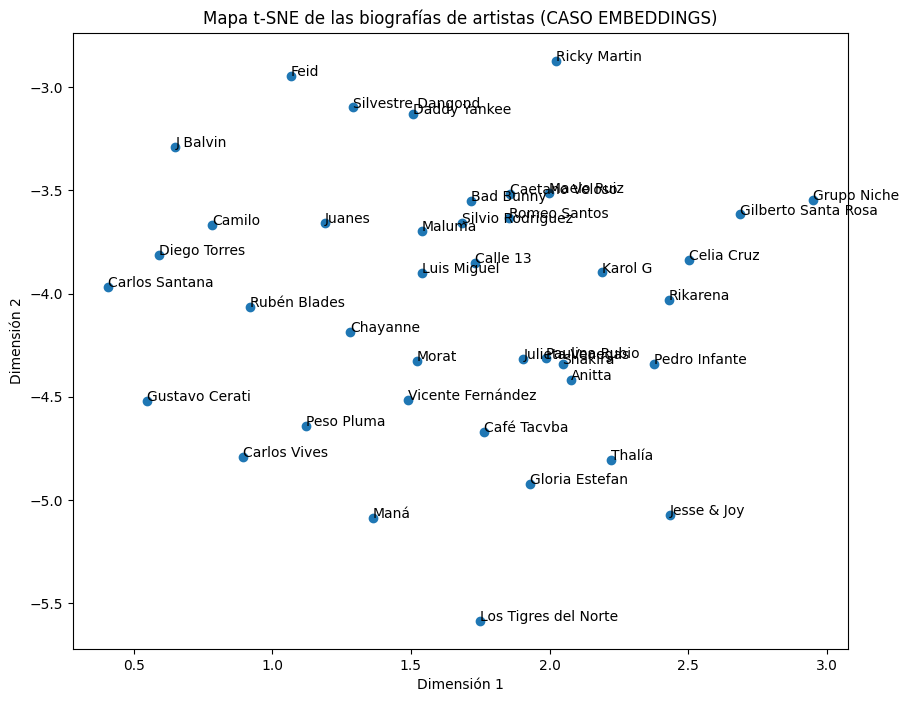

In [ ]:

# Cargar los datos procesados
df_procesado = pd.read_csv("artistas_procesados.csv")

# Tokenizar las biografías
tokenized_biographies = df_procesado['Biografía'].apply(word_tokenize)

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=tokenized_biographies, vector_size=100, window=5, min_count=1, workers=4)

# Guardar el modelo entrenado
model.save("word2vec_model.bin")

# Crear la representación de texto basada en embeddings
biography_vectors = []
for biography in tokenized_biographies:
    vectors = [model.wv[word] for word in biography if word in model.wv]
    if vectors:
        biography_vector = sum(vectors) / len(vectors)
    else:
        biography_vector = [0] * model.vector_size  # Vector de ceros si la biografía está vacía
    biography_vectors.append(biography_vector)

# Convertir biography_vectors a un array NumPy
biography_matrix = np.array(biography_vectors)

# Reducción de dimensionalidad usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
biography_tsne = tsne.fit_transform(biography_matrix)  # Utilizamos biography_matrix en lugar de biography_vectors

# Visualización de las biografías en un mapa t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(biography_tsne[:, 0], biography_tsne[:, 1])

# Etiquetar los puntos con los nombres de los artistas
for i, label in enumerate(df_procesado['Nombre']):
    plt.annotate(label, (biography_tsne[i, 0], biography_tsne[i, 1]))

plt.title('Mapa t-SNE de las biografías de artistas (CASO EMBEDDINGS)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()


In [ ]:

# Calcula las distancias euclidianas entre los puntos en el mapa t-SNE
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

distances_tsne = []
for i in range(len(biography_tsne)):
    for j in range(i + 1, len(biography_tsne)):
        distance = euclidean_distance(biography_tsne[i], biography_tsne[j])
        distances_tsne.append((i, j, distance))

# Ordena las distancias de menor a mayor
distances_tsne.sort(key=lambda x: x[2])

# Imprime las primeras x distancias
for i in range(10):
    idx1, idx2, distance = distances_tsne[i]
    artist1 = df_procesado.loc[idx1, 'Nombre']
    artist2 = df_procesado.loc[idx2, 'Nombre']
    print(f"Distancia entre {artist1} y {artist2}: {distance}")


Distancia entre Paulina Rubio y Shakira: 0.06576521694660187
Distancia entre Paulina Rubio y Julieta Venegas: 0.0825146809220314
Distancia entre Shakira y Anitta: 0.08552106469869614
Distancia entre Silvio Rodríguez y Bad Bunny: 0.11413506418466568
Distancia entre Romeo Santos y Caetano Veloso: 0.11971826106309891
Distancia entre Paulina Rubio y Anitta: 0.14153166115283966
Distancia entre Caetano Veloso y Maelo Ruiz: 0.14168791472911835
Distancia entre Caetano Veloso y Bad Bunny: 0.14250685274600983
Distancia entre Julieta Venegas y Shakira: 0.1425885707139969
Distancia entre Silvio Rodríguez y Maluma: 0.1489814817905426


Explicación:
- Observando los resultados se evidencia que artistas como Pulina Rubio, Julieta Venegas, Shakira y Annita se encuentran cerca. La razón es que sus biografias tienen contextos similares como lo son: cantante, compositora, actriz y su relación con el genero POP.
- Otro ejemplo es Bad Bunny, Silvio Rodriguez, Caetano Veloso y Romeo Santos. De igual manera estos personajes comparten un contexto similar en sus biografias, como lo son: Cantante, compositor y Musico

# REPRESSENTACIÓN BASADA EN TF-IDF

In [ ]:

# Cargar los datos procesados
df_procesado = pd.read_csv("artistas_procesados.csv")

# Crear un objeto TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.8)

# Ajustar y transformar los datos de la columna 'Biografía' para obtener la representación TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df_procesado['Biografía'])

# Obtener los nombres de las características (palabras) del vectorizador
feature_names = tfidf_vectorizer.get_feature_names_out()

# Crear un DataFrame a partir de la matriz TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Guardar el DataFrame de TF-IDF en un archivo CSV
df_tfidf.to_csv("tfidf_representation.csv", index=False)


In [ ]:
! pip install gensim


In [ ]:
# Obtener los vectores TF-IDF para todas las palabras
tfidf_vectors = []
for biography in tokenized_biographies:
    vectors = [model.wv[word] * model.wv.get_vecattr(word, 'count') for word in biography if word in model.wv]
    if vectors:
        tfidf_vector = sum(vectors) / len(vectors)
    else:
        tfidf_vector = [0] * model.vector_size  # Vector de ceros si la biografía está vacía
    tfidf_vectors.append(tfidf_vector)


Al aplicar TF-IDF se muestran agrupaciones de personajes basadas en similitudes en su contenido textual. Personajes con vocabularios o temas similares en sus textos se ubicarán cerca uno del otro. Esta visualización ayuda a identificar relaciones temáticas o de contenido entre los personajes sin necesidad de leer los textos en detalle.

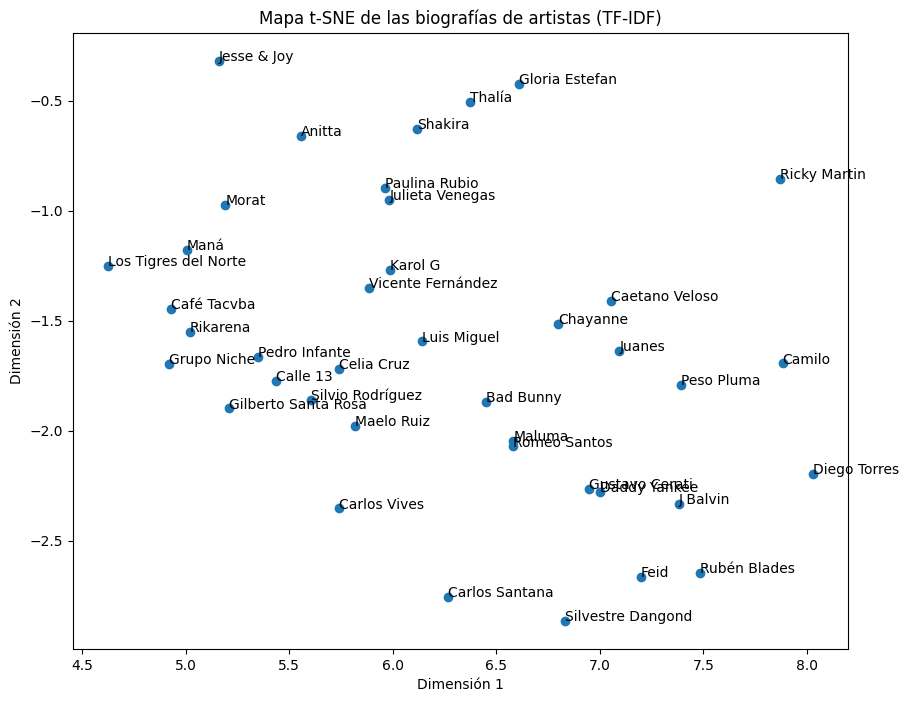

In [ ]:
# Convertir tfidf_vectors a una matriz NumPy
tfidf_matrix = np.array(tfidf_vectors)

# Reducción de dimensionalidad usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tfidf_tsne = tsne.fit_transform(tfidf_matrix)  # Utilizamos tfidf_matrix en lugar de tfidf_vectors

# Visualización de las biografías en un mapa t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1])

# Etiquetar los puntos con los nombres de los artistas
for i, label in enumerate(df_procesado['Nombre']):
    plt.annotate(label, (tfidf_tsne[i, 0], tfidf_tsne[i, 1]))

plt.title('Mapa t-SNE de las biografías de artistas (TF-IDF)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()


In [ ]:

# Calcula las distancias euclidianas entre los puntos en el mapa t-SNE
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

distances_tfidf_tsne = []
for i in range(len(tfidf_tsne)):
    for j in range(i + 1, len(tfidf_tsne)):
        distance = euclidean_distance(tfidf_tsne[i], tfidf_tsne[j])
        distances_tfidf_tsne.append((i, j, distance))

# Ordena las distancias de menor a mayor
distances_tfidf_tsne.sort(key=lambda x: x[2])

# Imprime las primeras x distancias
for i in range(10):
    idx1, idx2, distance = distances_tfidf_tsne[i]
    artist1 = df_procesado.loc[idx1, 'Nombre']
    artist2 = df_procesado.loc[idx2, 'Nombre']
    print(f"Distancia entre {artist1} y {artist2}: {distance}")

Distancia entre Romeo Santos y Maluma: 0.024665698409080505
Distancia entre Daddy Yankee y Gustavo Cerati: 0.05722837150096893
Distancia entre Paulina Rubio y Julieta Venegas: 0.059815771877765656
Distancia entre Vicente Fernández y Karol G: 0.1309993416070938
Distancia entre Café Tacvba y Rikarena: 0.13723723590373993
Distancia entre Calle 13 y Pedro Infante: 0.1430487036705017
Distancia entre Rikarena y Grupo Niche: 0.17910169064998627
Distancia entre Calle 13 y Silvio Rodríguez: 0.19042153656482697
Distancia entre Celia Cruz y Silvio Rodríguez: 0.19663989543914795
Distancia entre Maluma y Bad Bunny: 0.221583291888237


Explicación:
- El primer ejemplo es el de Romeo Santos y Maluma, en este caso ambos tienen la misma descripción en su biografía, en este caso son las palabras 'salto a la fama'.
- En el caso de Daddy Yankee y Gustavo Cerati comparten la descripción de: 'es considerado uno de los músicos más influyentes/pioneros de'
- Otro ejemplo es Paulina Rubio y Julieta Venegas, que tienen las palbras 'reconocimiento mundial' en sus biografias.